In [22]:
import numpy as np
import re

# Define possible values for each hyperparameter in the order you want the dimensions
hidden_dim_options = [8, 32, 128]
episodes_options = [500, 1500, 4500]
gamma_options = [0.9, 0.95, 0.99]
learning_rate_options = [0.001, 0.01, 0.1]

# Create a mapping from value -> index for each parameter
hidden_map = {v: i for i, v in enumerate(hidden_dim_options)}
episodes_map = {v: i for i, v in enumerate(episodes_options)}
gamma_map = {v: i for i, v in enumerate(gamma_options)}
lr_map = {v: i for i, v in enumerate(learning_rate_options)}

# Initialize 4D matrix
results = np.full((3, 3, 3, 3), np.nan)

# Read the file
with open("results_gs.txt", "r") as f:
    content = f.read()

# Split into blocks (each block has params + reward)
blocks = content.strip().split("\n\n")

for block in blocks:
    # Extract parameters
    params_line, reward_line, *_ = block.split("\n")

    # Parse parameters
    hidden = int(re.search(r"--hidden_dim'?,\s*'?(\d+)", params_line).group(1))
    episodes_val = int(re.search(r"--episodes'?,\s*'?(\d+)", params_line).group(1))
    gamma = float(re.search(r"--gamma'?,\s*'?(\d*\.\d+)", params_line).group(1))
    lr = float(re.search(r"--learning_rate'?,\s*'?(\d*\.\d+)", params_line).group(1))

    # Parse reward
    avg_reward = float(re.search(r"average reward:\s*([\d\.]+)", reward_line).group(1))

    # Store in array
    results[
        hidden_map[hidden],
        episodes_map[episodes_val],
        gamma_map[gamma],
        lr_map[lr],
    ] = avg_reward

results.shape

(3, 3, 3, 3)

In [23]:
results[0,0]

array([[252.5, 112. , 276.9],
       [290.6, 269.5, 278.7],
       [293.8, 200.5, 110.3]])

In [24]:
import matplotlib.pyplot as plt

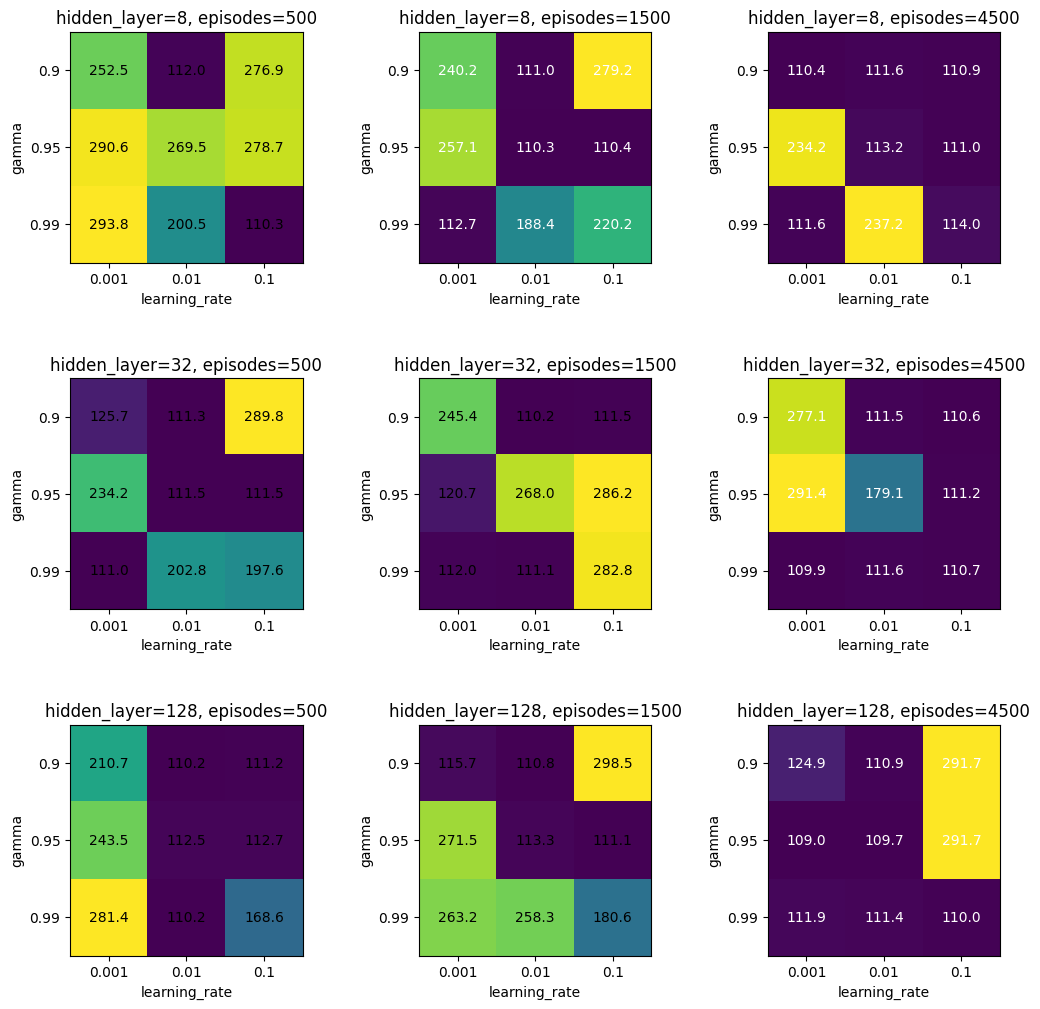

In [26]:
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec

# Create figure and GridSpec
fig = plt.figure(figsize=(12, 12))
outer_grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5)
for i in range(3):
    for j in range(3):
        all_values = results[i,j].flatten()
        norm = Normalize(vmin=all_values.min(), vmax=all_values.max())
        cmap = 'viridis'

        square_matrix = results[i,j]
        min_val = np.min(square_matrix)
        max_val = np.max(square_matrix)

        # Plot 6x6 square matrix
        ax_square = fig.add_subplot(outer_grid[3*i+j])
        im = ax_square.imshow(square_matrix, aspect='auto', cmap=cmap, norm=norm)
        ax_square.set_xlabel("learning_rate")
        ax_square.set_ylabel("gamma")
        ax_square.set_xticks(np.arange(3))
        ax_square.set_yticks(np.arange(3))
        ax_square.set_xticklabels(learning_rate_options)
        ax_square.set_yticklabels(gamma_options)
        ax_square.set_xlim(-0.5, 2.5)
        ax_square.set_title(f"hidden_layer={hidden_dim_options[i]}, episodes={episodes_options[j]}")
        # add text to each pixel
        for k in range(square_matrix.shape[0]):
            for l in range(square_matrix.shape[1]):
                string = str(np.round(square_matrix[k, l], 2))
                if (square_matrix[i,j]-min_val)/(max_val-min_val) < 0.5:
                    text = ax_square.text(l, k, string, ha='center', va='center', color='white')
                else:
                    text = ax_square.text(l, k, string, ha='center', va='center', color='black')

        # Save axes for shared colorbar
        #cbar_ax = fig.add_subplot(inner_grid[0])
        #cbar = fig.colorbar(
        #    ScalarMappable(norm=norm, cmap=cmap),
        #    cax=cbar_ax,
        #    orientation='horizontal',
        #    label="probability"
        #)

plt.show()